# Titaninic Survival Prediction

In [ ]:
#Data Wrangling
import numpy as np 
import pandas as pd
import missingno

#Data Visualisation
import matplotlib as plt
import seaborn as sns
from sklearn import preprocessing

#Machine Model Algo
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


# Data Preprocessing

In [ ]:
#importing data
df= pd.read_csv("train.csv")
test_df= pd.read_csv("test.csv")

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Finding null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Info regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Removing non essential features
df1 = df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [ ]:
#Summary Stats
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Value counts for Sex
df1['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# Convert Sex into numerical values where 0 = male and 1 = female
df1['Sex'] = df1['Sex'].map({'male': 0, 'female': 1})


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd02b59d810>]],
      dtype=object)

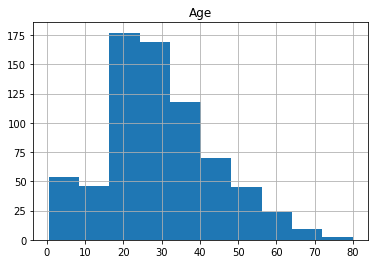

In [ ]:
#Checking frequency of age feature
df1.hist(column='Age')

In [ ]:
# Finding outliers
def find_outliers_IQR(df1):
  q1=df1.quantile(0.25)
  q3=df1.quantile(0.75)
  IQR=q3-q1
  outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))].index
  return outliers

outliers = find_outliers_IQR(df1["Age"])

print("number of outliers: "+ str(len(outliers)))
print(outliers)

number of outliers: 11
Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')


In [ ]:
# Dropping Outliers
print("Before: {} rows".format(len(df1)))
df1 = df1.drop(outliers, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(df1)))

Before: 891 rows
After: 880 rows


In [ ]:
# Compute median of Age 
median = df1['Age'].dropna().median()
median

28.0

In [ ]:
# Filling missing values in Age
df1['Age'].fillna(median, inplace = True)
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
# Checking test data set
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#Removing non essential features from test
test_df1 = test_df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [ ]:
# Compute median of Age in test dataset
median = test_df1['Age'].dropna().median()
median

27.0

In [ ]:
# Filling missing values in Age in test dataset
test_df1['Age'].fillna(median, inplace = True)
test_df1.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      1
dtype: int64

In [ ]:
# Replacing missing value with median in test dataset for Fare feature
median_fare = test_df1['Fare'].dropna().median()
test_df1['Fare'].fillna(median_fare, inplace = True)
test_df1.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [ ]:
# Convert Sex into numerical values where 0 = male and 1 = female
test_df1['Sex'] = test_df1['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# Converting datatype from float to int
data = [df1, test_df1]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)

test_df1.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


# Model Fitting and Testing

In [ ]:
#Splitting data 
X_train = df1.drop('Survived', axis = 1)
Y_train = df1['Survived']
X_test = test_df1
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (880, 6)
Y_train shape:  (880,)
X_test shape:  (418, 6)


In [ ]:
#Logistic Regression
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)
Y_pred = logReg.predict(X_test)
acc_log = round(logReg.score(X_train, Y_train) * 100, 2)
acc_log

79.43

In [ ]:
#Support Vector Machine
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.07

In [ ]:
#K-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

81.25

In [ ]:
#Gaussian NB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.41

In [ ]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


72.39

In [ ]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

95.23

In [ ]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

95.23

In [ ]:
#Training Accuracy
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, 
                                 acc_linear_svc, acc_decision_tree]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,95.23
1,Decision Tree,95.23
2,KNN,81.25
3,Logistic Regression,79.43
4,Naive Bayes,78.41
5,Linear SVC,72.39
6,Support Vector Machines,68.07


# Conclusion

From the accuracy table, we can say Random Forest and Decision Tree are best suited for the corresponding dataset. With parameter tuning, the accuracy can be further improved.